### Course Description

One of the foundational aspects of statistical analysis is inference, or the process of drawing conclusions about a larger population from a sample of data. Although counter intuitive, the standard practice is to attempt to disprove a research claim that is not of interest. For example, to show that one medical treatment is better than another, we can assume that the two treatments lead to equal survival rates only to then be disproved by the data. Additionally, we introduce the idea of a p-value, or the degree of disagreement between the data and the hypothesis. We also dive into confidence intervals, which measure the magnitude of the effect of interest (e.g. how much better one treatment is than another).`

**p-value measures the degree of disagreement between the data and the null hypothesis**

In [3]:
#install the packages if required
#install.packages('NHANES', repos='http://cran.us.r-project.org')
devtools

package 'NHANES' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mohammads6\AppData\Local\Temp\RtmpwnXQPf\downloaded_packages


In [4]:
library(NHANES)
library(dplyr)
library(tidyr)
library(ggplot2)

Warning message:
"package 'NHANES' was built under R version 3.4.2"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



# 1. Introduction to ideas of inference 

In this chapter, you will investigate how repeated samples taken from a population can vary. It is the variability in samples that allow you to make claims about the population of interest. It is important to remember that the research claims of interest focus on the population while the information available comes only from the sample data.

## Welcome to the course!

### Hypotheses (1)

Consider drug A for diabetes that a pharmaceutical company is trying to pass through the FDA. Currently, most doctors prescribe drug B to treat diabetes.

Which would be a good null hypothesis?

Possible Answers
- Drug A is better than drug B at treating diabetes.
- Drug A is worse than drug B at treating diabetes.
- Drug A is different than drug B at treating diabetes (but you don't know if it is better or worse).
- Drug A is the same as drug B at treating diabetes. (Correct)

### Hypotheses (2)

Consider the same situation as in the last exercise. A pharmaceutical company is trying to pass drug A for diabetes through the FDA, but most doctors currently prescribe drug B.

Which would be a good alternative hypothesis?

Possible Answers
 - Drug A is better than drug B at treating diabetes. (Correct)
 - Drug A is worse than drug B at treating diabetes.
 - Drug A is different than drug B at treating diabetes (but you don't know if it is better or worse).
 - Drug A is the same as drug B at treating diabetes.

The alternative hypothesis corresponds to the research question of interest, in this case whether drug A is more effective at treating diabetes than drug B.

## Randomized distributions - Video

### Working with the NHANES data

Throughout this chapter, you will use the NHANES dataset from the NHANES R package. These data are collected by the CDC and can be thought of as a random sample of US residents.

Before moving on to investigate particular variables, you'll have an opportunity to briefly explore the data in this exercise.

Instructions
 - Load the dplyr, ggplot2, and NHANES packages, one at a time.
 - Use the names() function to list the variables included in NHANES. (See ?NHANES for more info.)
 - Create a barplot for HomeOwn broken down by Gender. Use geom_bar(position = "fill") to compare relative frequencies.
 - Create a density plot for SleepHrsNight colored by SleepTrouble and faceted by HealthGen.
      - Note that because of the discrete nature of the data collection, the density should be smoothed a bit u sing adjust = 2.
      - Use facet_wrap(~ HealthGen) for the faceting, which will make it easier to visualize how the variables of interest vary by.

Warning message:
"package 'dplyr' was built under R version 3.3.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.3.3"Warning message:
"package 'NHANES' was built under R version 3.3.3"

[1] "ID"               "SurveyYr"         "Gender"           "Age"             
 [5] "AgeDecade"        "AgeMonths"        "Race1"            "Race3"           
 [9] "Education"        "MaritalStatus"    "HHIncome"         "HHIncomeMid"     
[13] "Poverty"          "HomeRooms"        "HomeOwn"          "Work"            
[17] "Weight"           "Length"           "HeadCirc"         "Height"          
[21] "BMI"              "BMICatUnder20yrs" "BMI_WHO"          "Pulse"           
[25] "BPSysAve"         "BPDiaAve"         "BPSys1"           "BPDia1"          
[29] "BPSys2"           "BPDia2"           "BPSys3"           "BPDia3"          
[33] "Testosterone"     "DirectChol"       "TotChol"          "UrineVol1"       
[37] "UrineFlow1"       "UrineVol2"        "UrineFlow2"       "Diabetes"        
[41] "DiabetesAge"      "HealthGen"        "DaysPhysHlthBad"  "DaysMentHlthBad" 
[45] "LittleInterest"   "Depressed"        "nPregnancies"     "nBabies"         
[49] "Age1stBaby"       "SleepHrsNight"    "SleepTrouble"     "PhysActive"      
[53] "PhysActiveDays"   "TVHrsDay"         "CompHrsDay"       "TVHrsDayChild"   
[57] "CompHrsDayChild"  "Alcohol12PlusYr"  "AlcoholDay"       "AlcoholYear"     
[61] "SmokeNow"         "Smoke100"         "Smoke100n"        "SmokeAge"        
[65] "Marijuana"        "AgeFirstMarij"    "RegularMarij"     "AgeRegMarij"     
[69] "HardDrugs"        "SexEver"          "SexAge"           "SexNumPartnLife" 
[73] "SexNumPartYear"   "SameSex"          "SexOrientation"   "PregnantNow"

Warning message:
"Removed 2245 rows containing non-finite values (stat_density)."

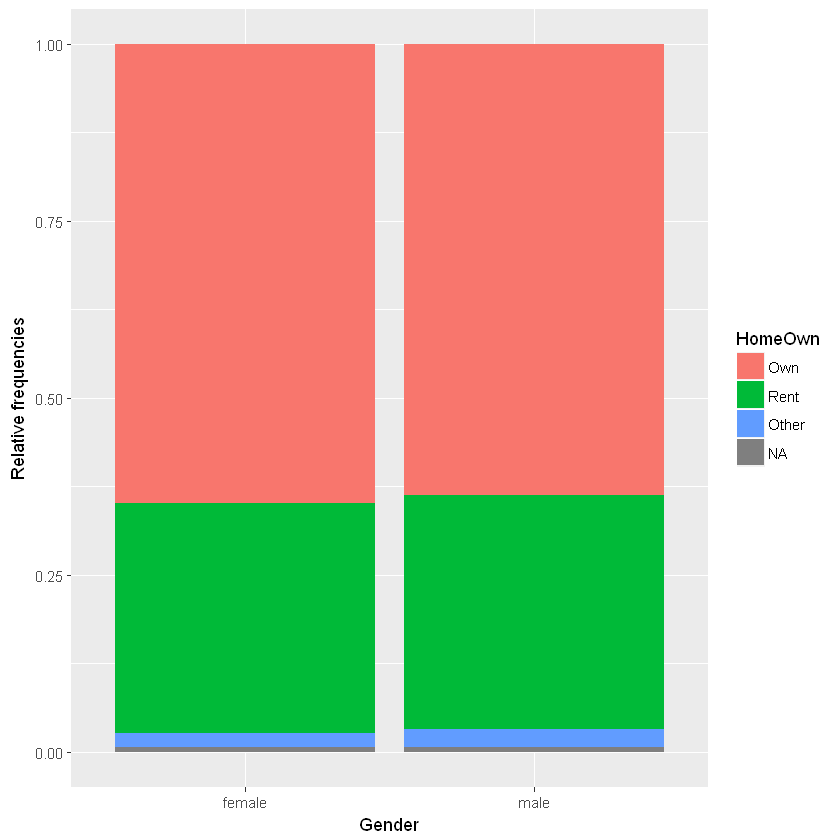

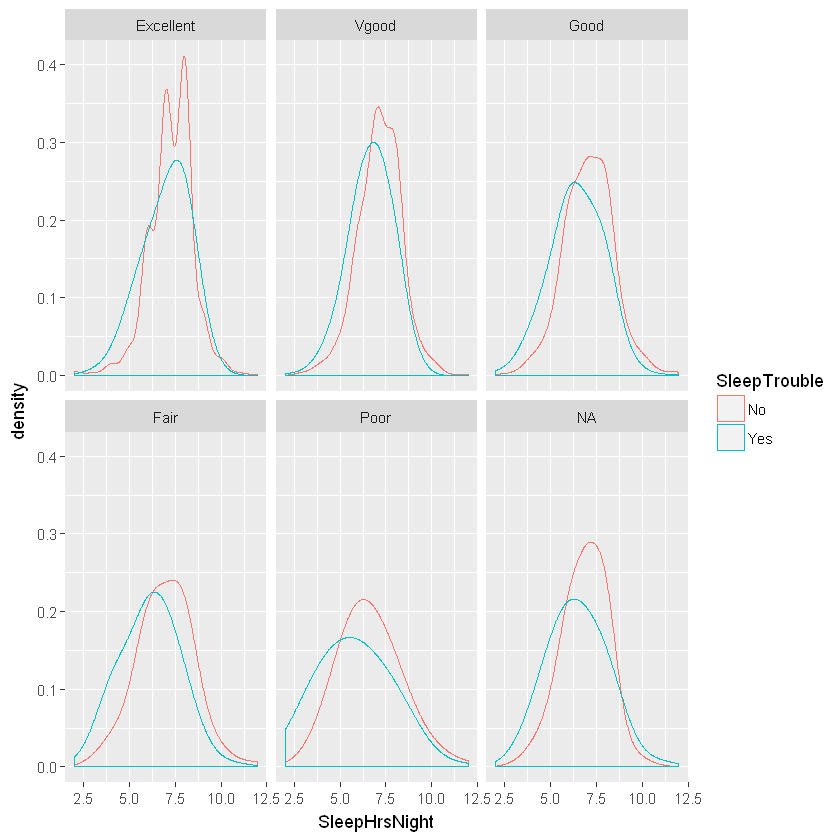

In [1]:
# Load packages
library(dplyr)
library(ggplot2)
library(NHANES)
#install.packages("NHANES")

# What are the variables in the NHANES dataset?
names(NHANES)

# Create bar plot for Home Ownership by Gender
ggplot(NHANES, aes(x = Gender, fill = HomeOwn)) + 
  geom_bar(position = "fill") +
  ylab("Relative frequencies")

# Density for SleepHrsNight colored by SleepTrouble, faceted by HealthGen
ggplot(NHANES, aes(x =  SleepHrsNight, col = SleepTrouble)) + 
  geom_density(adjust=2) + 
  facet_wrap(~HealthGen)

Notice that the warning message for the densities and the grey portions of the bars both indicate a large number of missing observations in the dataset. If this were your dataset, it would be important to stop here and consider the cause of the missingness. For the course, we will now proceed without worrying about the missing observations.

In [5]:
#Testing
dim(NHANES)

[1] 10000    76

### Randomly allocating samples

As seen in the video, you will now use R to randomly permute the observations and calculate a difference in proportions that could arise from a null distribution.

Using the NHANES dataset, let's investigate the relationship between gender and home ownership. Type ?NHANES in the console to get a description of its variables.

Instructions
The dplyr, ggplot2, and NHANES packages have been loaded for you.

- Subset the NHANES dataset to consider only individuals whose home ownership status is either "Own" or "Rent". Save the result to homes.
- Perform a single permutation to evaluate whether home ownership status (i.e. HomeOwn) differs between the "female" and "male" groups:
    - In your mutate() call, use sample() to shuffle home ownership status. Call this new variable HomeOwn_perm, a permuted version of HomeOwn.
    - Group by Gender.
    - In both the original data and in the permuted data, compute the proportion of individuals who own a home. Note that this will calculate proportions for both genders since you've grouped by the Gender variable in the line before it.
    - Using the diff() function, calculate the difference in proportion of home ownership for both prop_own_perm, the permuted data, and prop_own, the original data.

In [6]:
# Subset the data: homes
homes <- NHANES %>%
  select(Gender, HomeOwn) %>%
  filter(HomeOwn %in% c("Own", "Rent"))

# Perform one permutation 
homes %>%
  mutate(HomeOwn_perm = sample(HomeOwn)) %>%
  group_by(Gender) %>%
  summarize(prop_own_perm = mean(HomeOwn_perm == "Own"), 
            prop_own = mean(HomeOwn == "Own")) %>%
  summarize(diff_perm = diff(prop_own_perm),
            diff_orig = diff(prop_own))

diff_perm,diff_orig
-0.0008267323,-0.007828723


Keep in mind, this is just a single random permutation. Next, you'll look at several permuted differences to see how they compare with the observed difference.

### Randomization dotplot (n = 10)

As you saw in the video, natural variability can be modeled from shuffling observations around to remove any relationships that might exist in the population. This is done with the rep_sample_n() function from the oilabs package. Within it, you must specify arguments for the data (tbl), the sample size, the number of samples to take (reps), and whether sampling should be done with or without replacement (replace). The output includes a new column, replicate, which indicates the sample number. For example,

homes %>% 
  rep_sample_n(size = 5, reps = 3)
  
will return three samples of 5 observations from the homes dataset you created in the last exercise. The first 5 rows will have a value of 1 in the replicate column, the next 5 rows will have a value of 2, and so on. Note that the default value for the replace argument is FALSE.

In this exercise, you will permute the home ownership variable 10 times. By doing so, you will ensure that there is no relationship between home ownership and gender, so any difference in home ownership proportion for female versus male will be due only to natural variability.

Instructions     
 - The dplyr, ggplot2, NHANES, and oilabs packages have been loaded for you and the homes dataset you created in the last exercise is available in your workspace.
 - Using rep_sample_n(), repeat the permutation process from the last exercise to get 10 null differences in proportions (i.e. reps = 10) using all observations in the homes dataset. Assign the result to homeown_perm.
 - Print the permuted differences in homeown_perm to the console.
 - Using geom_dotplot(), plot the differences in proportions obtained by shuffling the HomeOwn variable. Adjust the size of the dots by including binwidth = .001 in your call to geom_dotplot().

In [ ]:
library(devtools)
devtools::install_github("andrewpbray/oilabs")
library(oilabs)

In [7]:
library(oilabs)

ERROR: Error in library(oilabs): there is no package called 'oilabs'


In [8]:
rep_sample_n = function (tbl, size, replace = FALSE, reps = 1){
    n <- nrow(tbl)
    i <- unlist(replicate(reps, sample.int(n, size, replace = replace), 
        simplify = FALSE))
    rep_tbl <- cbind(replicate = rep(1:reps, rep(size, reps)), 
        tbl[i, ])
    dplyr::group_by(rep_tbl, replicate)
}

# A tibble: 10 x 3
   replicate     diff_perm    diff_orig
       <int>         <dbl>        <dbl>
1          1  0.0148247764 -0.007828723
2          2  0.0045277312 -0.007828723
3          3 -0.0115356592 -0.007828723
4          4 -0.0053574322 -0.007828723
5          5 -0.0078287230 -0.007828723
6          6 -0.0041217867 -0.007828723
7          7 -0.0004148505 -0.007828723
8          8  0.0028802040 -0.007828723
9          9  0.0041158494 -0.007828723
10        10 -0.0008267323 -0.007828723


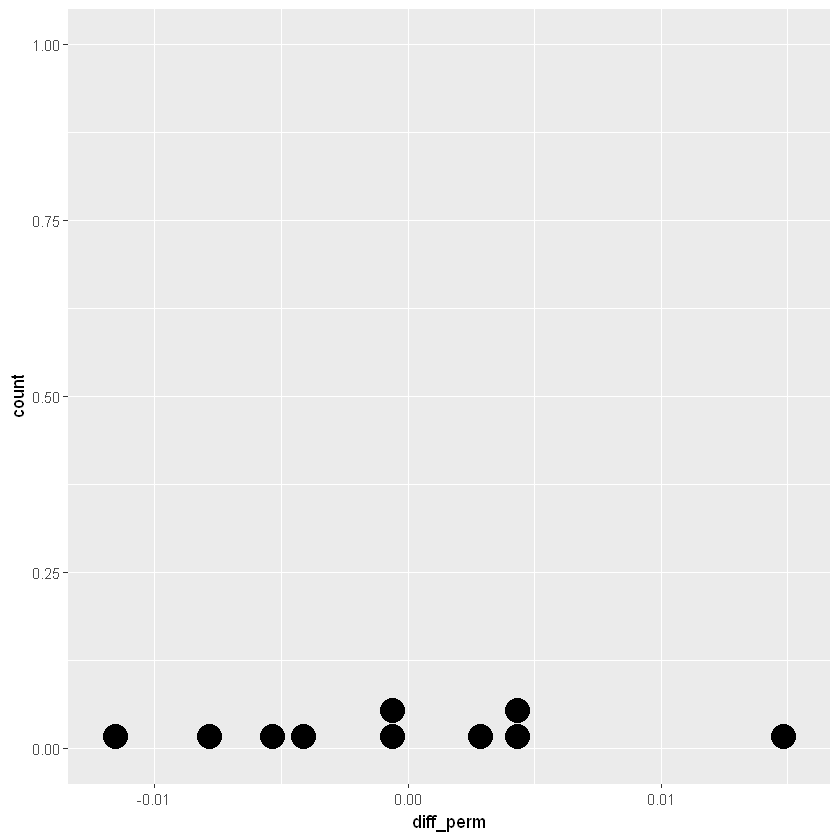

In [9]:
library(oilabs)
# Perform 10 permutations
homeown_perm <- homes %>%
  rep_sample_n(size = nrow(homes), reps = 10) %>%
  mutate(HomeOwn_perm = sample(HomeOwn)) %>%
  group_by(replicate,Gender) %>%
  summarize(prop_own_perm = mean(HomeOwn_perm == "Own"), 
            prop_own = mean(HomeOwn == "Own")) %>%
  summarize(diff_perm = diff(prop_own_perm),
            diff_orig = diff(prop_own)) # male - female

# Print differences to console
print(homeown_perm)

# Dotplot of 10 permuted differences in proportions
ggplot(homeown_perm, aes(x = diff_perm)) + 
  geom_dotplot(binwidth = 0.001)

From the dotplot, it's still hard to get an idea of what the null distribution looks like. You'll repeat the process with 100 permutations in the next exercise. Awesome job!

### Randomization dotplot (n = 100)

By permuting the home ownership variable multiple times, you generate differences in proportions when in fact the variables are not at all related.

Instructions   
    - The dplyr, ggplot2, NHANES, and oilabs packages have been loaded for you. Repeat the permuting and plotting with 100 differences in proportions generated by shuffling the HomeOwn variable. Adjust the size of the dots by including binwidth = .001 in your call to geom_dotplot().

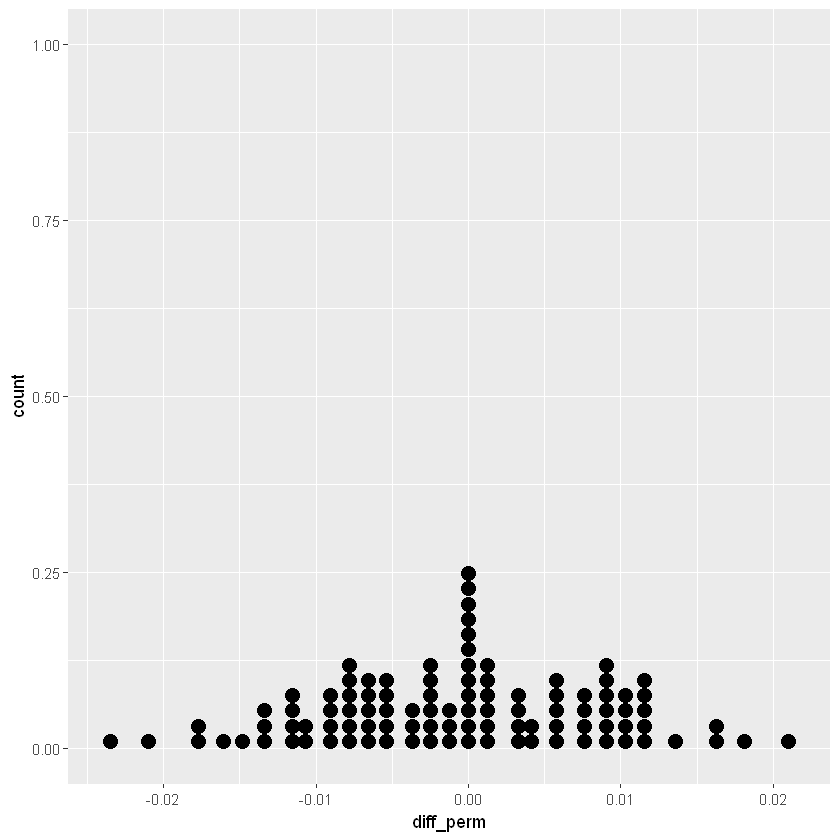

In [10]:
# Perform 100 permutations
homeown_perm <- homes %>%
  rep_sample_n(size = nrow(homes), reps = 100) %>%
  mutate(HomeOwn_perm = sample(HomeOwn)) %>%
  group_by(replicate,Gender) %>%
  summarize(prop_own_perm = mean(HomeOwn_perm == "Own"),
            prop_own = mean(HomeOwn == "Own")) %>%
  summarize(diff_perm = diff(prop_own_perm),
            diff_orig = diff(prop_own)) # male - female

# Dotplot of 100 permuted differences in proportions
ggplot(homeown_perm, aes(x = diff_perm)) + 
  geom_dotplot(binwidth = 0.001)

It's much easier to get a feel for the distribution now. In the next exercise, you'll see how 1000 permutations are distributed.

### Randomization density

Using 100 repetitions allows you to understand the mechanism of permuting. However, 100 is not enough to observe the full range of likely values for the null differences in proportions.

In this exercise, you'll repeat the process 1000 times to get a sense for the complete distribution of null differences in proportions.

Instructions     
The dplyr, ggplot2, NHANES, and oilabs packages have been loaded for you.

  - Generate 1000 differences in proportions by shuffling the HomeOwn variable and following the same procedure as before.
  - Use geom_density() to create a smoothed visual representation of the distribution of differences.

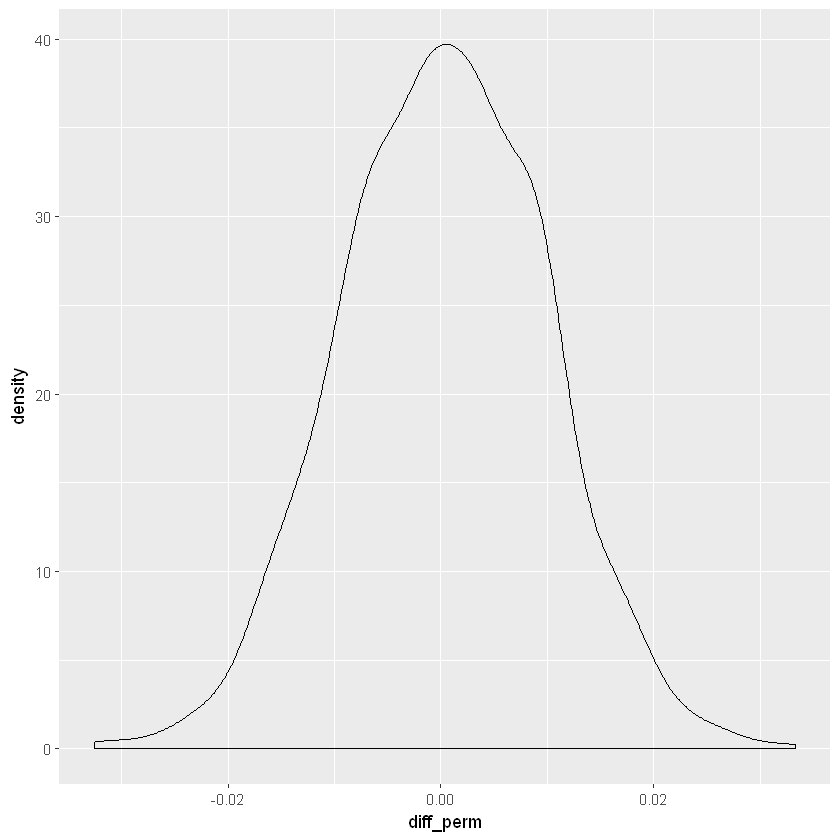

In [11]:
# Perform 1000 permutations
homeown_perm <- homes %>%
  rep_sample_n(size = nrow(homes), reps = 1000) %>%
  mutate(HomeOwn_perm = sample(HomeOwn)) %>%
  group_by(replicate,Gender) %>%
  summarize(prop_own_perm = mean(HomeOwn_perm == "Own"),
            prop_own = mean(HomeOwn == "Own")) %>%
  summarize(diff_perm = diff(prop_own_perm),
            diff_orig = diff(prop_own)) # male - female

# Density plot of 1000 permuted differences in proportions
ggplot(homeown_perm, aes(x = diff_perm)) + 
  geom_density()

You can now see that the distribution is approximately normally distributed around -0.01, but what can we conclude from it? You'll learn how to use this distribution in the next video.

## Using the randomization distribution - Video

### Do the data come from the population?

Recall that the observed difference (i.e. the difference in proportions in the homes dataset, shown as the red vertical line) was around -0.0078, which seems to fall below the bulk of the density of shuffled differences. It is important to know, however, whether any of the randomly permuted differences were as extreme as the observed difference.

In this exercise, you'll re-create this dotplot as a density plot and count the number of permuted differences that were to the left of the observed difference.

Instructions    
The homeown_perm dataset is available in your workspace.     
    - Using geom_density(), plot the permuted differences. Add a vertical red line with geom_vline() where the observed statistic falls.
    - Count the number of permuted differences that were lower than or equal to the observed difference.
    

sum(diff_orig >= diff_perm)
206


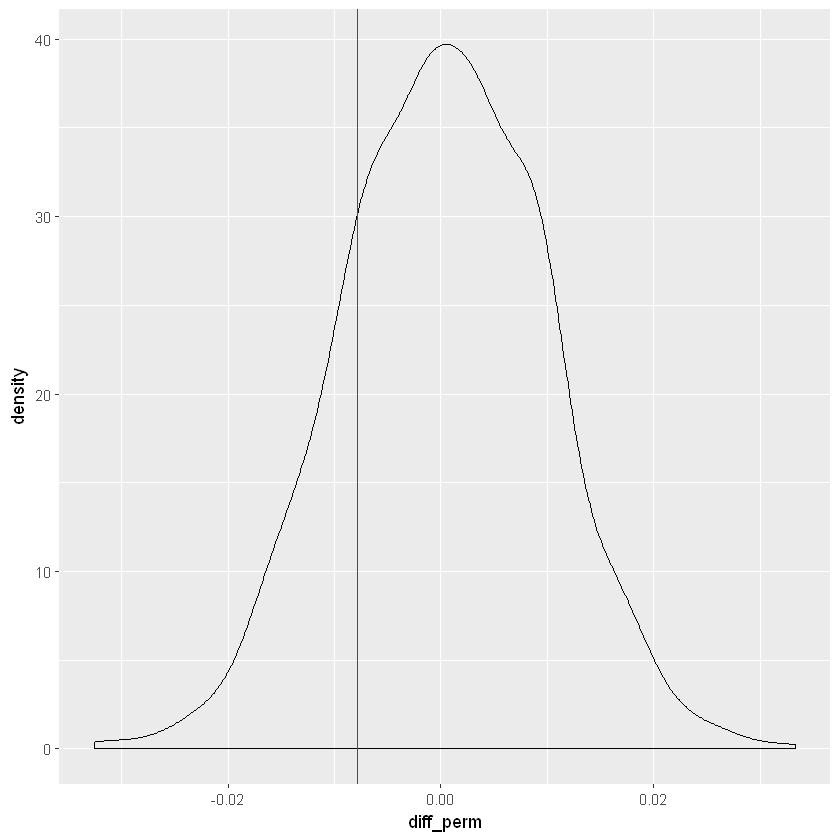

In [12]:
# Plot permuted differences
ggplot(homeown_perm, aes(x =diff_perm)) + 
  geom_density() +
  geom_vline(aes(xintercept = diff_orig),
          col = "red")

# Compare permuted differences to observed difference
homeown_perm %>%
  summarize(sum(diff_orig >= diff_perm))

212 permuted differences are more extreme than the observed difference. This only represents 21.2% of the null statistics, so you can conclude that the observed difference is consistent with the permuted distribution.

### What can you conclude?

What can you conclude from the analysis?

Possible Answers     
    - We have learned that being female causes people to buy houses.
    - We have learned that our data is consistent with the hypothesis of no difference in home ownership across gender. (Correct)
    - We have learned that the observed difference (from the data) in proportion of home ownership across gender is due to something other than random variation.


## Study conclusions - Video

# 2. Completing a randomization test: gender discrimination 

In this chapter, you will gain the tools and knowledge to complete a full hypothesis test. That is, given a dataset, you will know whether or not is appropriate to reject the null hypothesis in favor of the research claim of interest.

## Example: gender discrimination - Video

### Gender discrimination hypotheses

Which of the following null (H0H0) and alternative (HAHA) hypotheses are appropriate for the gender discrimination example described in the previous video?

Possible Answers
- H0H0: gender and promotion are unrelated variables. (Correct)
- HAHA: men are more likely to be promoted. (Correct)
- H0H0: gender and promotion are unrelated variables.
- HAHA: women are more likely to be promoted.
- H0H0: men are more likely to be promoted.
- HAHA: gender and promotion are unrelated variables.
- H0H0: women are more likely to be promoted.
- HAHA: gender and promotion are unrelated variables.

### Summarizing gender discrimination

As the first step of any analysis, you should look at and summarize the data. Categorical variables are often summarized using proportions, and it is always important to understand the denominator of the proportion.

Do you want the proportion of women who were promoted or the proportion of promoted individuals who were women? Here, you want the first of these, so in your R code it's necessary to group_by() the sex variable.

Instructions

The discrimination study data are available in your workspace as disc.

- Using the table() function, summarize the data as a contingency table.
- Summarize the data by using group_by() on the sex variable and finding the proportion who were promoted. Call this variable promoted_prop. Note that with binary variables, the proportion of either value can be found using the mean() function (e.g. mean(variable == "value")).

In [5]:
disc <- read.table("disc.txt", header = TRUE)
head(disc)
tail(disc)

promote,sex
promoted,male
promoted,male
promoted,male
promoted,male
promoted,male
promoted,male


,promote,sex
43,not_promoted,female
44,not_promoted,female
45,not_promoted,female
46,not_promoted,female
47,not_promoted,female
48,not_promoted,female


In [14]:
# Create a contingency table summarizing the data
table(disc)

# Find proportion of each sex who were promoted
disc %>% group_by(sex) %>% summarize(promoted_prop = mean(promote == "promoted"))

              sex
promote        female male
  not_promoted     10    3
  promoted         14   21

sex,promoted_prop
female,0.5833333
male,0.8750000


In [ ]:
Okay, so the difference in proportions promoted is almost 0.3. Great work!

### Step-by-step through the permutation

To help you understand the code used to create the randomization distribution, this exercise will walk you through each step, one at a time.

Remember that when using the pipe notation (%>%) with so-called tidy functions like mutate() and summarize() from the dplyr package, each input is a data frame and each output is also a data frame. To keep the output manageable, we will use only 5 replicates here.

Instructions

The dplyr and oilabs packages have been loaded for you, along with the disc data frame from the last exercise. Note that in each step in this exercise, you will simply print the result to the screen (and not save it).

- Use the rep_sample_n() function from the oilabs package to create a data frame by sampling the entire disc data frame 5 times.
- Within each of the 5 replicates of the original data, shuffle the promote variable to break any relationship between promotion and gender.
- Building on the previous data frame, group by replicate and sex then find the proportion of individuals promoted in each grouped category.
- Continuing, find the difference in proportion of "promoted" across sex grouped by replicate.

In [15]:
# Sample the entire data frame 5 times
disc %>%
  rep_sample_n(size = nrow(disc), reps = 5) 

# Shuffle the promote variable within replicate
disc %>%
  rep_sample_n(size = nrow(disc), reps = 5) %>%
  mutate(prom_perm = sample(promote)) 

# Find the proportion of promoted in each replicate and sex
disc %>%
  rep_sample_n(size = nrow(disc), reps = 5) %>%
  mutate(prom_perm = sample(promote)) %>%
  group_by(replicate, sex) %>%
  summarize(prop_prom_perm = mean(prom_perm=="promoted"),
            prop_prom = mean(promote=="promoted")) 

# Difference in proportion of promoted across sex grouped by gender
disc %>%
  rep_sample_n(size = nrow(disc), reps = 5) %>%
  mutate(prom_perm = sample(promote)) %>%
  group_by(replicate, sex) %>%
  summarize(prop_prom_perm = mean(prom_perm=="promoted"),
            prop_prom = mean(promote=="promoted"))   %>%
  summarize(diff_perm = diff(prop_prom_perm),
            diff_orig = diff(prop_prom))  # male - female

,replicate,promote,sex
29,1,promoted,female
22,1,promoted,female
44,1,not_promoted,female
45,1,not_promoted,female
27,1,promoted,female
16,1,promoted,male
13,1,promoted,male
36,1,not_promoted,male
35,1,promoted,female
23,1,promoted,female


replicate,promote,sex,prom_perm
1,promoted,female,promoted
1,promoted,female,not_promoted
1,promoted,male,promoted
1,promoted,male,promoted
1,not_promoted,female,promoted
1,promoted,male,promoted
1,not_promoted,female,promoted
1,promoted,male,promoted
1,promoted,female,not_promoted
1,promoted,female,promoted


replicate,sex,prop_prom_perm,prop_prom
1,female,0.6666667,0.5833333
1,male,0.7916667,0.8750000
2,female,0.7083333,0.5833333
2,male,0.7500000,0.8750000
3,female,0.7500000,0.5833333
3,male,0.7083333,0.8750000
4,female,0.7083333,0.5833333
4,male,0.7500000,0.8750000
5,female,0.7083333,0.5833333
5,male,0.7500000,0.8750000


replicate,diff_perm,diff_orig
1,0.12500000,0.2916667
2,-0.04166667,0.2916667
3,0.20833333,0.2916667
4,0.12500000,0.2916667
5,-0.04166667,0.2916667


Let's quickly recap what you just did. Using rep_sample_n(), you took 5 repeated samples (i.e. Replications) of the disc data, then shuffled these using sample() to break any links between gender and getting promoted. Then for each replication, you calculated the proportions of promoted males and females in the dataset along with the difference in proportions. Excellent work!

### Randomizing gender discrimination

Recall that we are considering a situation where the number of men and women are fixed (representing the resumes) and the number of people promoted is fixed (the managers were able to promote only 35 individuals).

In this exercise, you'll create a randomization distribution of the null statistic with 1000 replicates as opposed to just 5 in the previous exercise. As a reminder, the statistic of interest is the difference in proportions promoted between genders (i.e. proportion for males minus proportion for females).

Instructions

- Using the discrimination data, repeat the previous exercise with 1000 replicates:
    - Sample the original data 1000 times.
    - Permute the promote variable to break the link between promotion and sex.
    - Group by replicate and sex and then calculate the proportion promoted within each group.
    - Find the difference in proportions promoted across sex (grouped by replicate).
- Create a histogram of the permuted differences and add a red line at the observed difference. Use binwidth = 0.01 in your call to geom_histogram().

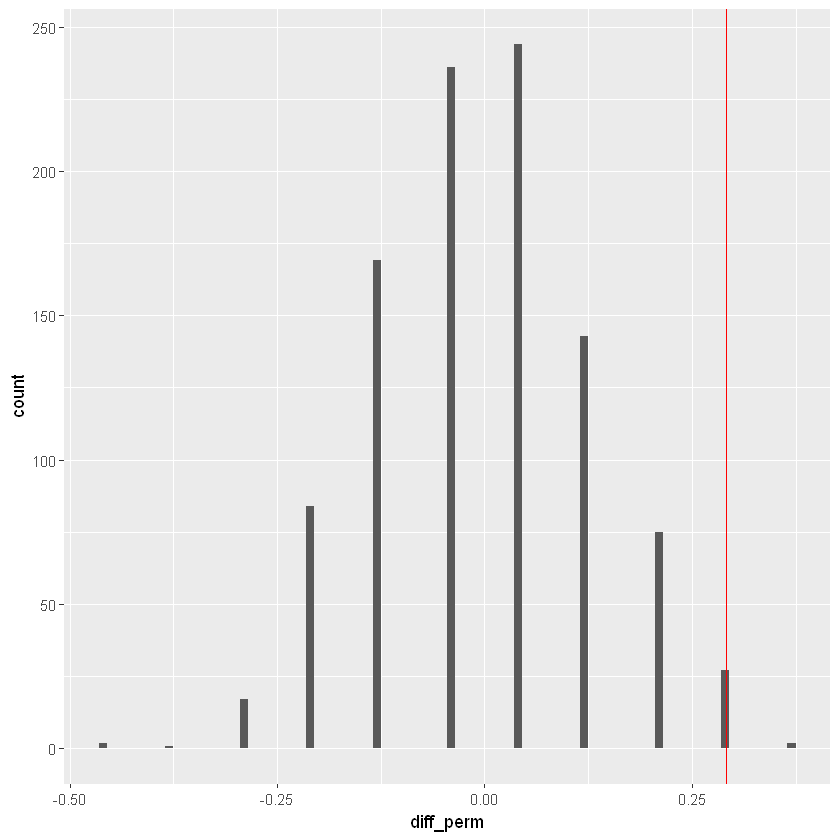

In [10]:
# Create a data frame of differences in promotion rates
disc_perm <- disc %>%
  rep_sample_n(size = nrow(disc), reps = 1000) %>%
  mutate(prom_perm = sample(promote)) %>%
  group_by(replicate, sex) %>%
  summarize(prop_prom_perm = mean(prom_perm=="promoted"),
            prop_prom = mean(promote=="promoted"))   %>%
  summarize(diff_perm = diff(prop_prom_perm),
            diff_orig = diff(prop_prom))  # male - female


# Histogram of permuted differences
ggplot(disc_perm, aes(x = diff_perm)) + 
  geom_histogram(binwidth = 0.01) +
  geom_vline(aes(xintercept = diff_orig), col = "red")

You'll learn more about the distribution of statistics in the next video.

## Distribution of statistics - Video

### Reflecting on analysis
50xp
Based on the plot you created in the last exercise (displayed again here), which of the following seems like a reasonable conclusion about promotions?

Possible Answers
- In the population there is no evidence that women are discriminated against.
- In the population there is no evidence that women are promoted at a different rate from men.
- In the population there is evidence that women are discriminated against.
- In the population there is evidence that women are promoted at a different rate, but we cannot tell whether the difference is due to discrimination or something else.(Correct)

In [ ]:
There are very few permuted differences which are as extreme as the observed difference.

### Critical region
100xp
It seems as though the statistic—a difference in promotion rates of 0.2917—is on the extreme end of the permutation distribution. That is, there are very few permuted differences which are as extreme as the observed difference.

To quantify the extreme permuted (null) differences, we use the quantile() function.

Instructions
The dplyr package has been loaded for you. Using the permuted differences, disc_perm, find the quantile values such that:

- 10% of the permuted differences are above the value (0.90 quantile)
- 5% of the permuted differences are above the value (0.95 quantile)
- 1% of the permuted differences are above the value (0.99 quantile)

In [11]:
# Find the 0.90, 0.95, and 0.99 quantiles of diff_perm
disc_perm %>% 
  summarize(q.90 = quantile(diff_perm, p = 0.90),
            q.95 = quantile(diff_perm, p = 0.95),
            q.99 = quantile(diff_perm, p = 0.99))

q.90,q.95,q.99
0.2083333,0.2083333,0.2916667


### Two-sided critical region
100xp
For the discrimination data, the question at hand is whether or not women were promoted less often than men. However, there are often scenarios where the research question centers around a difference without directionality.

For example, you might be interested in whether the rate of promotion for men and women is different. In that case, a difference in proportions of -0.29 is just as "extreme" as a difference of positive 0.29.

If you had seen that women were promoted more often, what would the other side of the distribution of permuted differences look like? That is, what are the smallest (negative) values of the distribution of permuted differences?

Instructions
Using the permuted differences, disc_perm, find the quantile values such that:

 - 1% of the permuted differences are below the value (0.01 quantile)
 - 5% of the permuted differences are below the value (0.05 quantile)
 - 10% of the permuted differences are below the value (0.10 quantile)

In [12]:
# Find the 0.01, 0.05, and 0.10 quantiles of diff_perm
disc_perm %>% 
  summarize(q.01 = quantile(diff_perm, p = 0.01),
            q.05 = quantile(diff_perm, p = 0.05),
            q.10 = quantile(diff_perm, p = 0.10))

q.01,q.05,q.10
-0.2916667,-0.2083333,-0.2083333


## Why 0.05? - Video

### How does sample size affect results?
50xp
Notice that the observed difference of 0.2917 is in the extreme right tail of the permuted differences. If the sample was ten times larger but the sample statistic was exactly the same (i.e. 0.2917), how would the distribution of permuted differences change?

The statistic of 0.2917 would ______.

Possible Answers
Be closer to the bulk of the permuted differences (within the distribution)
Remain in the same location (in the right tail of the distribution of permuted differences)
Be much farther to the right of the permuted differences (completely off of the distribution) (Correct)
Take Hint (-15xp)

The statistic would be much farther to the right of the permuted differences, as you'll see in the next exercise.

### Sample size in randomization distribution
100xp
We've created two new datasets for you with essentially the same difference in proportions as the original discrimination data. However, one of the datasets (disc_small) is one third the size of the original dataset and the other (disc_big) is 10 times larger than the original dataset.

Additionally, the same permutation code used previously has been run on the small and big datasets to create small and big distributions of permuted differences in promotion rates (disc_small_perm and disc_big_perm, respectively).

In this exercise, you'll use these two new distributions to get a sense for how the differences vary given widely different sample sizes. In particular, notice the range of variability on the x-axis of each plot.

Instructions
Use table() to tabulate the new small and big data frames.
Use ggplot() to visualize the permuted differences using geom_histogram(). Use binwidth = 0.01 in your call to geom_histogram() and add a red line at the observed difference.

In [13]:
disc_small = readRDS("disc_small.rds")
disc_big = readRDS("disc_big.rds")

In [15]:
disc_small_perm <- disc_small %>%
  rep_sample_n(size = nrow(disc_small), reps = 1000) %>%
  mutate(prom_perm = sample(promote)) %>%
  group_by(replicate, sex) %>%
  summarize(prop_prom_perm = mean(prom_perm=="promoted"),
            prop_prom = mean(promote=="promoted"))   %>%
  summarize(diff_perm = diff(prop_prom_perm),
            diff_orig = diff(prop_prom))  # male - female

disc_big_perm <- disc_big %>%
  rep_sample_n(size = nrow(disc_big), reps = 1000) %>%
  mutate(prom_perm = sample(promote)) %>%
  group_by(replicate, sex) %>%
  summarize(prop_prom_perm = mean(prom_perm=="promoted"),
            prop_prom = mean(promote=="promoted"))   %>%
  summarize(diff_perm = diff(prop_prom_perm),
            diff_orig = diff(prop_prom))  # male - female

        promote
sex      not_promoted promoted
  female            3        5
  male              1        7

        promote
sex      not_promoted promoted
  female          100      140
  male             30      210

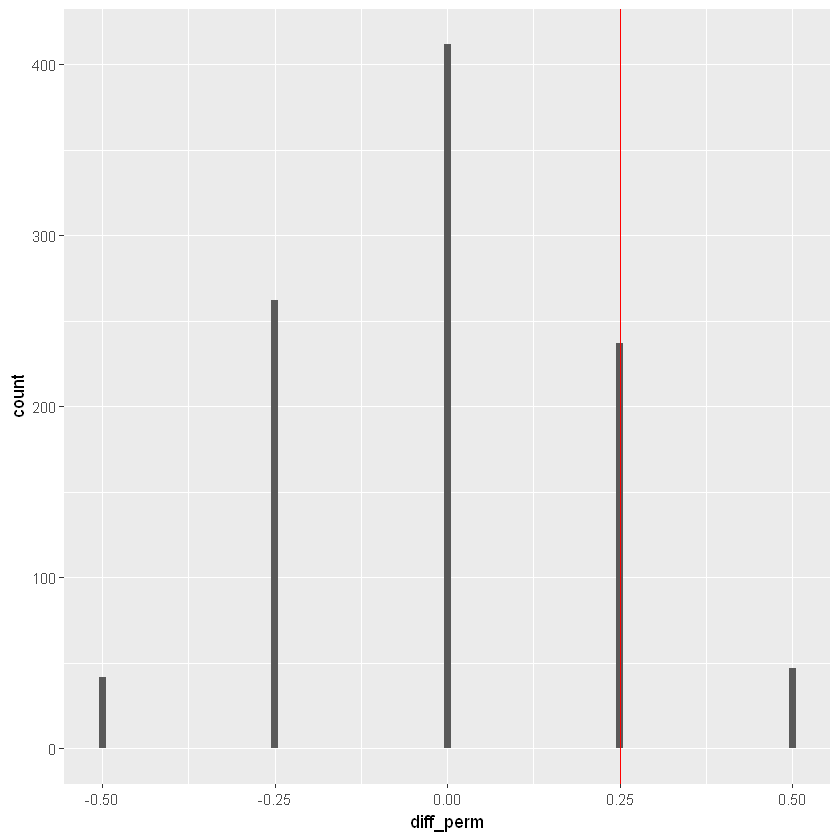

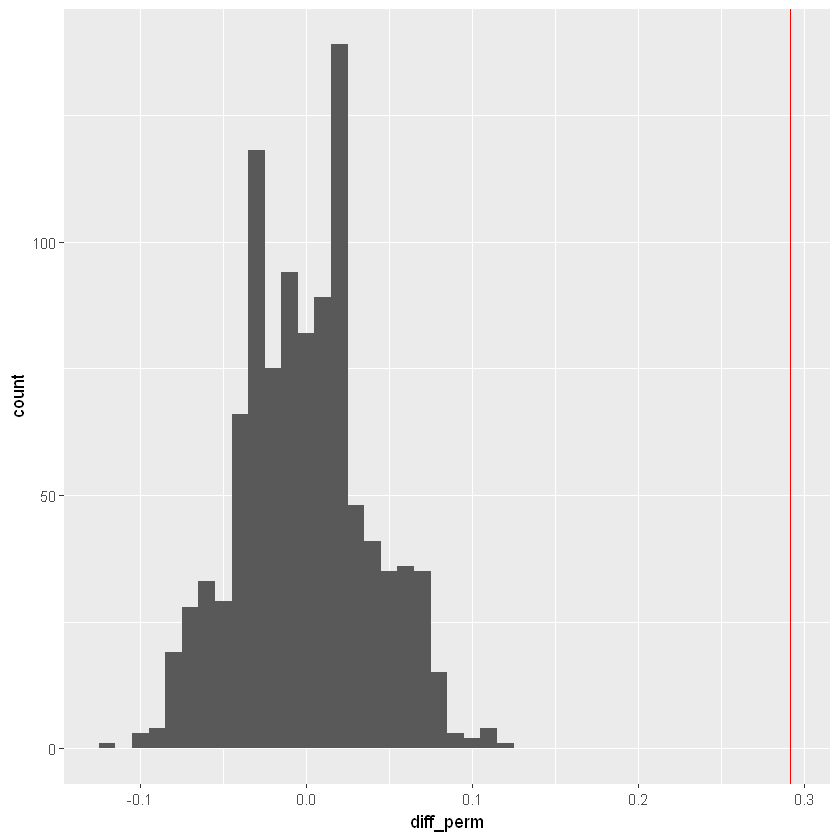

In [17]:
# Tabulate the small and big data frames
disc_small %>% 
  select(sex, promote) %>%
  table()
disc_big %>% 
  select(sex, promote) %>%
  table()

# Plot the distributions of permuted differences
ggplot(disc_small_perm, aes(x = diff_perm)) + 
  geom_histogram(binwidth = 0.01) +
  geom_vline(aes(xintercept = diff_orig), col = "red")

ggplot(disc_big_perm, aes(x = diff_perm)) + 
  geom_histogram(binwidth = 0.01) +
  geom_vline(aes(xintercept = diff_orig), col = "red")

! The observed difference is consistent with differences you would see by chance if the sample size was small. The observed difference would virtually never be observed by chance if the sample size was big.

Sample size for critical region
100xp
Using the randomization distributions with the small and big datasets, calculate different cutoffs for significance. Remember, you are most interested in a large positive difference in promotion rates, so you are calculating the upper quantiles of 0.90, 0.95, and 0.99.

Instructions
As a reference point, calculate the relevant quantiles associated with the original dataset of 1000 permuted differences, disc_perm.
For the small dataset, disc_small_perm, calculate the quantiles for the permuted differences in promotion rates.
For the big dataset, disc_big_perm, calculate the quantiles for the permuted differences in promotion rates.

In [16]:
# Recall the quantiles associated with the original dataset
disc_perm %>% 
  summarize(q.90 = quantile(diff_perm, p = 0.90),
            q.95 = quantile(diff_perm, p = .95),
            q.99 = quantile(diff_perm, p = .99))

# Calculate the quantiles associated with the small dataset
disc_small_perm %>% 
  summarize(q.90 = quantile(diff_perm, p = 0.90),
            q.95 = quantile(diff_perm, p = .95),
            q.99 = quantile(diff_perm, p = .99))


# Calculate the quantiles associated with the big dataset
disc_big_perm %>% 
  summarize(q.90 = quantile(diff_perm, p = 0.90),
            q.95 = quantile(diff_perm, p = .95),
            q.99 = quantile(diff_perm, p = .99))

q.90,q.95,q.99
0.2083333,0.2083333,0.2916667


q.90,q.95,q.99
0.25,0.25,0.5


q.90,q.95,q.99
0.05,0.06666667,0.08341667


In [ ]:
> # Recall the quantiles associated with the original dataset
> disc_perm %>% 
    summarize(q.90 = quantile(diff_perm, p = 0.90),
              q.95 = quantile(diff_perm, p = .95),
              q.99 = quantile(diff_perm, p = .99))
# A tibble: 1 × 3
       q.90      q.95      q.99
      <dbl>     <dbl>     <dbl>
1 0.2083333 0.2083333 0.2916667
> 
> # Calculate the quantiles associated with the small dataset
> disc_small_perm %>% 
    summarize(q.90 = quantile(diff_perm, p = 0.90),
              q.95 = quantile(diff_perm, p = .95),
              q.99 = quantile(diff_perm, p = .99))
# A tibble: 1 × 3
   q.90  q.95  q.99
  <dbl> <dbl> <dbl>
1  0.25  0.25   0.5
> 
> 
> 
> 
> # Calculate the quantiles associated with the big dataset
> disc_big_perm %>% 
    summarize(q.90 = quantile(diff_perm, p = 0.90),
              q.95 = quantile(diff_perm, p = .95),
              q.99 = quantile(diff_perm, p = .99))
# A tibble: 1 × 3
   q.90    q.95  q.99
  <dbl>   <dbl> <dbl>
1  0.05 0.05875   0.1

# What is a p-value? - Video

### Calculating the p-values

In the video, you learned that a p-value measures the degree of disagreement between the data and the null hypothesis. Here, you will calculate the p-value for the original discrimination dataset as well as the small and big versions, disc_small and disc_big.

Recall that you're only interested in the one-sided hypothesis test here. That is, you're trying to answer the question, "Are men more likely to be promoted than women?"

Instructions
 - Use summarize() and mean() to determine the proportion of times the observed difference is less than or equal to the permuted difference.
 - Repeat for both the small and big datasets (one at a time).

In [ ]:
# Calculate the p-value for the original dataset
disc_perm %>%
  summarize(mean(diff_orig <= diff_perm))

# Calculate the p-value for the small dataset
disc_small_perm %>%
   summarize(mean(diff_orig <= diff_perm))

# Calculate the p-value for the big dataset
disc_big_perm %>%
  summarize(mean(diff_orig <= diff_perm))

### Practice calculating p-values
100xp
In the original dataset, 87.5% of the men were promoted and 58.3% of the women were promoted.

Consider a situation where there are 24 men, 24 women, and 35 people are still promoted. But in this new scenario, 75% of the men are promoted and 70.8% of the women are promoted. Does the difference in promotion rates still appear to be statistically significant? That is, could this difference in promotion rates have come from random chance?

You'll analyze these new data, contained in disc_new, using the same permutation algorithm from before.

Instructions
The disc_perm and disc_new_perm datasets are available in your workspace.

Using the code provided in the editor, print the tables of data to the console in order to compare the original data with the new data.
Plot the distributions of the permuted differences for both the original data and the new data. Use geom_histogram() with no binwidth specified and add a red vertical line at diff_orig to each plot with geom_vline().
Find the p-values for both the original and the new data.

In [ ]:
# Recall the original data
disc %>% 
  select(sex, promote) %>%
  table()

# Tabulate the new data
disc_new %>% 
  select(sex, promote) %>%
  table()

# Plot the distribution of the original permuted differences
ggplot(disc_perm, aes(x = diff_perm)) + 
  geom_histogram() +
  geom_vline(aes(xintercept = diff_orig), col = "red")

# Plot the distribution of the new permuted differences
ggplot(disc_new_perm, aes(x = diff_perm)) + 
  geom_histogram() +
  geom_vline(aes(xintercept = diff_orig), col = "red")



# Find the p-value from the original data
disc_perm %>%
  summarize(mean(diff_orig <= diff_perm))

# Find the p-value from the new data
disc_new_perm %>%
  summarize(mean(diff_orig <= diff_perm))

Notice that the permutation differences (the two histograms) are essentially the same regardless of whether the original or the new dataset is used.

### Calculating two-sided p-values

What if the original research hypothesis had focused on any difference in promotion rates between men and women instead of focusing on whether men are more likely to be promoted than women? In this case, a difference like the one observed would occur twice as often (by chance) because sometimes the difference would be positive and sometimes it would be negative.

When there is no directionality to the alternative hypothesis, the hypothesis and p-value are considered to be two-sided. In a two-sided setting, the p-value is double the one-sided p-value.

In this exercise, you'll calculate a two-sided p-value given the original randomization distribution and dataset.

Instructions
 - Using summarize() and mean(), double the original p-value to find how likely the observed difference is when considering the randomization distribution.

In [ ]:
# Calculate the two-sided p-value
disc_perm %>%
  summarize(2*mean(diff_orig <= diff_perm))

## Summary of gender discrimination - Video

# 3. Hypothesis testing errors: opportunity cost

You will continue learning about hypothesis testing with a new example and the same structure of randomization tests. In this chapter, however, the focus will be on different errors (type I and type II), how they are made, when one is worse than another, and how things like sample size and effect size impact the error rates.

## Example: opportunity cost

### Summarizing opportunity cost (1)

As you saw in the video, we're interested in whether the treatment and control groups were equally likely to buy a DVD after reading the experimental statements.

In this exercise, you'll use the data from the study to find the sample statistics (here: proportions) that are needed for the analysis.

Instructions
 - Use the table() function to tabulate the dataset called opportunity.
 - For each experimental group, find the proportion who bought a DVD.

In [ ]:
# Tabulate the data
opportunity %>%
  select(decision, group) %>%
  table()

# Find the proportion who bought the DVD in each group
opportunity %>%
  group_by(group) %>%
  summarize(buy_prop = mean(decision=="buyDVD"))

Okay, so about 75% of the control group bought the DVD and about 55% of the treatment group (i.e. The group that was reminded that the money could be saved) bought the DVD. Interesting!`

### Plotting opportunity cost

Again, interest is in whether the treatment and control groups were equally likely to buy a DVD after reading the experimental statements. Here, you'll create a barplot to visualize the difference in proportions between the treatment and control groups.

Instructions
 - Create a barplot for decision broken down by group. Use geom_bar(position = "fill") to compare relative frequencies. Note that fill should be defined by the decision for each group.

In [ ]:
# Create a barplot
ggplot(opportunity, aes(x = group, fill = decision)) + 
  geom_bar(position = "fill")

In [ ]:
The barplot better displays the results from the study. The treatment seems like it might have had an effect!

### Randomizing opportunity cost

As in Chapter 2, you will permute the data to generate a distribution of differences as if the null hypothesis were true.

In the study, the number of individuals in each of the control and treatment groups is fixed. Additionally, when you assume that the null hypothesis is true—that is, the experiment had no effect on the outcome of buying a DVD—it is reasonable to infer that the number of individuals who would buy a DVD is also fixed. That is, 97 people were going to buy a DVD regardless of which treatment group they were in.

Using the new data and the methods from the previous chapter, create a randomization distribution of the difference in proportions calculated on permuted data.

Instructions
 - Using the opportunity data, permute the decision variable 1000 times:
 - Sample the data 1000 times.
 - Permute the decision variable to break the link between decision and group.
 - Group by replicate and group and then calculate the proportion who bought the DVD within each group.
 - Find the difference in proportions across groups (grouped by replicate).
 - Create a histogram of the permuted differences and add a red line at the observed difference.

In [ ]:
# Data frame of differences in purchase rates after permuting
opp_perm <- opportunity %>%
  rep_sample_n(size = nrow(opportunity), reps = 1000) %>%
  mutate(dec_perm = sample(decision)) %>%
  group_by(replicate, group) %>%
  summarize(prop_buy_perm = mean(dec_perm == "buyDVD"),
            prop_buy = mean(decision == "buyDVD")) %>%
  summarize(diff_perm = diff(prop_buy_perm),
            diff_orig = diff(prop_buy))  # treatment - control


# Histogram of permuted differences
ggplot(opp_perm, aes(x = diff_perm)) + 
  geom_histogram(binwidth = .005) +
  geom_vline(aes(xintercept = diff_orig), col = "red")

In the next exercise, you'll calculate the p-value to judge if the difference in proportions permuted is consistent with the observed difference.

### Summarizing opportunity cost (2)
100xp
Now that you've created the randomization distribution, you'll use it to assess whether the observed difference in proportions is consistent with the null difference. You will measure this consistency (or lack thereof) with a p-value, or the proportion of permuted differences less than or equal to the observed difference.

Instructions
 - Use summarize() and mean() to find the proportion of times the permuted differences in opp_perm are less than or equal to the observed difference.

In [ ]:
# Calculate the p-value
opp_perm %>%
  summarize(mean(diff_perm<=diff_orig))

In [ ]:
# A tibble: 1 × 1
  `mean(diff_perm <= diff_orig)`
                           <dbl>
1                          0.007

### Opportunity cost conclusion
50xp
In the last exercise, you computed the p-value, or the proportion of permuted differences less than or equal to the observed difference:

opp_perm %>%
  summarize(mean(diff_perm <= diff_orig))
Based on this result of 0.007, what can you conclude from the study about the effect of reminding students to save money?

Possible Answers
 - Reminding them causes them to be less likely to buy the DVD. (Correct)
 - Reminding them causes them to be more likely to buy the DVD.
 - There is no effect due to reminding students to save money.
 - Students who are reminded are less likely to buy the DVD, but it could be for reasons other than the reminder (i.e. the relationship is not necessarily causal).

We can confidently say the different messaging caused the students to change their buying habits, since they were randomly assigned to treatment and control groups. Let's continue.

## Errors and their consequences - Video

### Different choice of error rate
50xp
Consider again a situation where the task is to differentiate the proportion of successes across two different groups. What decision should be made if the goal is to never make a type II error (false negative)?

Possible Answers
 - Never claim there is a difference in proportions.
 - Always claim there is a difference in proportions. (Correct)
 - Claim there is a difference in proportions only if the difference is large enough.

 If you always claim there is a difference in proportions, you'll always reject the null hypothesis, so you'll only make type I errors, if any.

In [ ]:
Errors for two-sided hypotheses
50xp
Sometimes you'll be interested in identifying any difference in proportions (as opposed to one larger proportion). Consider these slightly adjusted hypotheses for the opportunity cost example:

H0H0: Reminding students that they can save money for later purchases will not have any impact on students' spending decisions.
HAHA: Reminding students that they can save money for later purchases will change the chance they will continue with a purchase.
What are type I (false positive) and type II (false negative) errors for the two-sided hypotheses related to the opportunity costs example?

Possible Answers
Type I: There is a difference in proportions, but the observed difference is not big enough to indicate that the proportions are different.
Type II: There is not a difference in proportions, but the observed difference is large enough to indicate that the proportions are different.
Type I: There is not a difference in proportions, and the observed difference is not big enough to indicate that the proportions are different.
Type II: There is a difference in proportions, and the observed difference is large enough to indicate that the proportions are different.
Type I: There is not a difference in proportions, but the observed difference is big enough to indicate that the proportions are different.
Type II: There is a difference in proportions, but the observed difference is not large enough to indicate that the proportions are different.
Type I: There is a difference in proportions, and the observed difference is big enough to indicate that the proportions are different.
Type II: There is not a difference in proportions, and the observed difference is not large enough to indicate that the proportions are different.
Take Hint (-15xp)

#3rd is correct

### p-value for two-sided hypotheses: opportunity costs

The p-value measures the likelihood of data as or more extreme than the observed data, given the null hypothesis is true. Therefore, the appropriate p-value for a two-sided alternative hypothesis is a two-sided p-value.

To find a two-sided p-value, you simply double the one sided p-value. That is, you want to find two times the proportion of permuted differences that are less than or equal to the observed difference.

Instructions
 - The opp_perm data frame, which contains the differences in permuted proportions, is available in your workspace. Use it to compute the two-sided p-value, or twice the proportion of permuted differences that are less than or equal to the original difference.

In [ ]:
# Calculate the two-sided p-value
opp_perm %>%
  summarize(2*mean(diff_perm<=diff_orig))

Take a moment to remind yourself why you used the proportion of permuted statistics that are smaller than (instead of bigger than) the observed value. Hint: look at the histogram of permuted statistics.

## Summary of opportunity costs - Video

# 4. Confidence intervals

As a complement to hypothesis testing, confidence intervals allow you to estimate a population parameter. Recall that your interest is always in some characteristic of the population, but you only have incomplete information to estimate the parameter using sample data. Here, the parameter is the true proportion of successes in a population. Bootstrapping is used to estimate the variability needed to form the confidence interval.

## Parameters and confidence intervals - Video

### Hypothesis test or confidence interval?
50xp
A university is trying to determine whether parking is a problem on its campus. The student newspaper contacts a random sample of 200 students and asks whether or not they are frustrated with the parking situation. They want to estimate the proportion of students at the college who are frustrated with the parking situation.

In this setting, which is more appropriate, a hypothesis test or a confidence interval?

Possible Answers
 - Hypothesis test because there is a particular research claim.
 - Hypothesis test because the goal is to estimate a population parameter
 - Confidence interval because there is a particular research claim.
 - Confidence interval because the goal is to estimate a population parameter. (Correct)

## Bootstrapping - Video

### Resampling from a sample

To investigate how much estimates of a population proportion change from sample to sample, you will set up two sampling experiments.

In the first experiment, you will simulate repeated samples from a population. In the second, you will choose a single sample from the first experiment and repeatedly resample from that sample—a method called bootstrapping. More specifically:

Experiment 1: Assume the true proportion of people who will vote for Candidate X is 0.6. Repeatedly sample 30 people from the population and measure the variability of p^p^ (the sample proportion).

Experiment 2: Take one sample of size 30 from the same population. Repeatedly sample 30 people (with replacement!) from the original sample and measure the variability of p^∗p^∗ (the resample proportion).

It's important to realize that the first experiment relies on knowing the population and is typically impossible in practice. The second relies only on the sample of data and is therefore easy to implement for any statistic. Fortunately, as you will see, the variability in p^p^, or the proportion of "successes" in a sample, is approximately the same whether we sample from the population or resample from a sample.

Instructions
We have created 1000 random samples, each of size 30, from the population. The resulting data frame, all_polls, is available in your workspace. Take a look before getting started.

 - Create a data frame called one_poll by filtering all_polls for only values from the first poll.
 - Take 1000 different resamples of size 30 from one_poll with replacement. Assign the result to one_poll_boot_30. Note that in the original sample, one_poll, 21/30 = 70% of people are planning to vote for Candidate X.
 - Compute the sample proportion for each of the 1000 original samples. Assign the result to ex1_props.
 - Compute the sample proportion for each of the 1000 resamples in one_poll_boot_30. Assign the result to ex2_props.
 - Using summarize() and sd(), compare the variability in sample proportions for the two different sampling experiments (one at a time).

In [ ]:
# Select one poll from which to resample: one_poll
one_poll <- all_polls %>%
  filter(poll == 1) %>%
  select(vote)
  
# Generate 1000 resamples of one_poll: one_poll_boot_30
one_poll_boot_30 <- one_poll %>%
  rep_sample_n(size = 30, replace = TRUE, reps = 1000)

# Compute p-hat for each poll: ex1_props
ex1_props <- all_polls %>% 
  group_by(poll) %>% 
  summarize(prop_yes = mean(vote))
  
# Compute p-hat* for each resampled poll: ex2_props
ex2_props <- one_poll_boot_30 %>%
  summarize(prop_yes = mean(vote))

# Compare variability of p-hat and p-hat*
ex1_props %>% summarize(sd(prop_yes))
ex2_props %>% summarize(sd(prop_yes))

In [ ]:
> ex1_props %>% summarize(sd(prop_yes))
# A tibble: 1 × 1
  `sd(prop_yes)`
           <dbl>
1     0.08683128
> ex2_props %>% summarize(sd(prop_yes))
# A tibble: 1 × 1
  `sd(prop_yes)`
           <dbl>
1     0.08260328

The variability in the proportion of “successes” in a sample is approximately the same whether we sample from the population or resample from a sample.

### Resampling from a sample (2)

In the previous exercise, the resamples (with replacement) were the same size as the original dataset. You originally polled 30 people, then you repeatedly resampled 30 votes from the original dataset (with replacement).

What if the original dataset was 30 observations, but you chose to resample only 3 individuals with replacement? Alternatively, what if you chose to resample 300 individuals with replacement? Let's call these Experiment 3 and Experiment 4, respectively.

Would the variability in these resampled p^∗p^∗ values still be a good proxy for the variability of the sampled p^p^ values taken from repeated samples from the population?

Instructions
The single sample from the population, one_poll, is still available in your workspace.

 - Take 1000 different resamples of size 3 from one_poll with replacement. Assign the result to one_poll_boot_3.
 - Do the same, but of size 300. Assign the result to one_poll_boot_300.
 - Compute p^∗p^∗ for the resampled polls from one_poll_boot_3 and one_poll_boot_300. Assign the results to ex3_props and ex4_props, respectively.
 - Using summarize() and sd() again, compare the variability of p^∗p^∗ in ex3_props and ex4_props.

In [ ]:
# Resample from one_poll with n = 3: one_poll_boot_3
one_poll_boot_3 <- one_poll %>%
  rep_sample_n(3, replace = TRUE, reps = 1000)

# Resample from one_poll with n = 300: one_poll_boot_300
one_poll_boot_300 <- one_poll %>%
  rep_sample_n(300, replace = TRUE, reps = 1000)
  
# Compute p-hat* for each resampled poll: ex3_props
ex3_props <- one_poll_boot_3 %>% 
  summarize(prop_yes = mean(vote))
  
# Compute p-hat* for each resampled poll: ex4_props
ex4_props <- one_poll_boot_300 %>% 
  summarize(prop_yes = mean(vote))

# Compare variability of p-hat* for n = 3 vs. n = 300
ex3_props %>% summarize(sd(prop_yes ))
ex4_props %>% summarize(sd(prop_yes ))

In [ ]:
> ex3_props %>% summarize(sd(prop_yes ))
# A tibble: 1 × 1
  `sd(prop_yes)`
           <dbl>
1      0.2724267
> ex4_props %>% summarize(sd(prop_yes ))
# A tibble: 1 × 1
  `sd(prop_yes)`
           <dbl>
1     0.02662452

Recall the variability of the sampled values taken from repeated samples from the population was about 0.0868. Note that resampling 3 or 300 individuals with replacement from the 30-observation dataset is not a good approximation of this value. Great work!

### Visualizing the variability of p-hat

In order to compare the variability of the sampled p^p^ and p^∗p^∗ values in the previous exercises, it is valuable to visualize their distributions. To recall, the exercises walked through four different experiments for investigating the variability of p^p^ and p^∗p^∗:

 - Experiment 1: Sample (n=30n=30) repeatedly from an extremely large population (gold standard, but unrealistic)
 - Experiment 2: Resample (n=30n=30) repeatedly with replacement from a single sample of size 30
 - Experiment 3: Resample (n=3n=3) repeatedly with replacement from a single sample of size 30
 - Experiment 4: Resample (n=300n=300) repeatedly with replacement from a single sample of size 30

Instructions
 - Run the code provided to recall the variability of sample proportions for each of the four experiments.
 - Create smoothed density plots of each of the 1000 p^p^ or p^∗p^∗ values. Note that the only density curve which matches the variability of the black population sampling curve is the green resampled curve with n=30n=30.

In [ ]:
# Recall the variability of sample proportions
ex1_props %>% summarize(sd(prop_yes))
ex2_props %>% summarize(sd(prop_yes))
ex3_props %>% summarize(sd(prop_yes))
ex4_props %>% summarize(sd(prop_yes))

# Create smoothed density curves for all four experiments
ggplot() + 
  geom_density(data = ex1_props, aes(x = prop_yes), col = "black", bw = .1) +
  geom_density(data = ex2_props, aes(x = prop_yes), col = "green", bw = .1) +
  geom_density(data = ex3_props, aes(x = prop_yes), col = "red", bw = .1) +
  geom_density(data = ex4_props, aes(x = prop_yes), col = "blue", bw = .1)

## Variability in p-hat - Video

### Empirical Rule
100xp
Many statistics we use in data analysis (including both the sample average and sample proportion) have nice properties that are used to better understand the population parameter(s) of interest.

One such property is that if the variability of the sample proportion (called the standard error, or SESE) is known, then approximately 95% of p^p^ values (from different samples) will be within 2SE2SE of the true population proportion.

To check whether that holds in the situation at hand, let's go back to the polls generated by taking many samples from the same population.

Instructions
The all_polls dataset contains 1000 samples of size 30 from a population with a probability of voting for Candidate X equal to 0.6.

 - For each sample, find the proportion of individuals who are planning to vote for Candidate X. Call this props.
 - What proportion of the 1000 sample proportions is within 2SE2SE of the true population value?

In [ ]:
# Compute proportion of votes for Candidate X: props
props <- all_polls %>%
  group_by(poll) %>% 
  summarize(prop_yes = mean(vote))

# Proportion of polls within 2SE
props %>%
  mutate(lower = 0.6 - 2 * sd(prop_yes),
         upper = 0.6 + 2 * sd(prop_yes),
         in_CI = prop_yes > lower & prop_yes < upper) %>%
  summarize(mean(in_CI))

In [ ]:
# A tibble: 1 × 1
  `mean(in_CI)`
          <dbl>
1         0.966

In [ ]:
In this example, it looks like 96.6% are within 2 standard errors of the true population parameter.

### Bootstrap t-confidence interval
100xp
The previous exercises told you two things:

You can measure the variability associated with p^p^ by resampling from the original sample.
Once you know the variability of p^p^, you can use it as a way to measure how far away the true proportion is.
Note that the rate of closeness (here 95%) refers to how often a sample is chosen so that it is close to the population parameter. You won't ever know if a particular dataset is close to the parameter or far from it, but you do know that over your lifetime, 95% of the samples you collect should give you estimates that are within 2SE2SE of the true population parameter.

Instructions
 - Using your original sample, calculate p^p^ and assign the result to p_hat.
 - By resampling, find the variability of p^p^ (around the true proportion).
 - Find an interval of values that are plausible for the true parameter by calculating p^±2SEp^±2SE.

In [ ]:
# Again, set the one sample that was collected
one_poll <- all_polls %>%
  filter(poll == 1) %>%
  select(vote)
  
# Compute p-hat from one_poll: p_hat
p_hat <- mean(one_poll$vote)

# Bootstrap to find the SE of p-hat: one_poll_boot
one_poll_boot <- one_poll %>%
  rep_sample_n(30, replace = TRUE, reps = 1000) %>%
  summarize(prop_yes_boot = mean(vote))

# Create an interval of plausible values
one_poll_boot %>%
  summarize(lower = p_hat - 2 * sd(prop_yes_boot),
            upper = p_hat + 2 * sd(prop_yes_boot))

In [ ]:
# A tibble: 1 × 2
      lower     upper
      <dbl>     <dbl>
1 0.5344212 0.8655788

Remember that a confidence level describes how likely you are to have gotten a sample that was close enough to the true parameter. Indeed, with the sample at hand, the confidence interval of plausible values does contain the true population parameter of 0.6. Nice job!

### Bootstrap percentile interval

The main idea in the previous exercise was that the distance between the original sample p^p^ and the resampled (or bootstrapped) p^∗p^∗ values gives a measure for how far the original p^p^ is from the true population proportion.

The same variability can be measured through a different mechanism. As before, if p^p^ is sufficiently close to the true parameter, then the resampled (bootstrapped) p^∗p^∗ values will vary in such a way that they overlap with the true parameter.

Instead of using ±2SE±2SE as a way to measure the middle 95% of the sampled p^p^ values, you can find the middle of the resampled p^∗p^∗ values by removing the upper and lower 2.5%. Note that this second method of constructing bootstrap intervals also gives an intuitive way for making 90% or 99% confidence intervals.

Instructions
 - Find the 2.5% and 97.5% quantiles of the bootstrapped p^∗p^∗ values contained in one_poll_boot.
 - Compare the interval created with these percentiles to the t-interval from the previous exercise. p_hat is available in your workspace.

In [ ]:
# Find the 2.5% and 97.5% of the p-hat values
one_poll_boot %>% 
  summarize(q025_prop = quantile(prop_yes_boot, p =0.025),
            q975_prop = quantile(prop_yes_boot, p = .975))

# Bootstrap t-confidence interval for comparison
one_poll_boot %>%
  summarize(lower = p_hat  - 2*sd(prop_yes_boot),
            upper = p_hat  + 2*sd(prop_yes_boot))

In [ ]:
# A tibble: 1 × 2
     lower    upper
     <dbl>    <dbl>
1 0.536148 0.863852

 Note that the two intervals were created using different methods. Because the methods are different, the intervals are expected to be a bit different as well. In the long run, however, the intervals should provide the same information.

## Interpreting CIs and technical conditions - Video

### Sample size effects on bootstrap CIs
100xp
In a previous exercise, you found that if you resampled the data with the wrong size (e.g. 300 or 3 instead of 30), the standard error of the sample proportions was off.

Here, you will use the incorrect standard error (based on the incorrect sample size) to create a confidence interval. The idea is that when the standard error is off, the interval is not particularly useful, nor is it correct.

Instructions
 - Recall the bootstrapped t-confidence interval from the previous exercise.
 - Collect a new sample of 30 observations from the population. Assume that the data come from a binomial distribution where there's a 60% chance the population will vote "yes".
 - Resample the data (with replacement) using a sample size of 300.
 - Find a bootstrap t-confidence interval for the resamples of size 300.
 - Resample the data (with replacement) using a sample size of 3.
 - Find a bootstrap t-confidence interval for the resamples of size 3.

In [ ]:
# Recall the bootstrap t-confidence interval
p_hat <- mean(one_poll$vote)
one_poll_boot %>%
  summarize(lower = p_hat - 2 * sd(prop_yes_boot),
            upper = p_hat + 2 * sd(prop_yes_boot))

# Collect a sample of 30 observations from the population
one_poll <- as.tbl(data.frame(vote = rbinom(30, 1, .6)))

# Resample the data using samples of size 300 (an incorrect strategy!)
one_poll_boot_300 <- one_poll %>%
  rep_sample_n(300, replace = TRUE, reps = 1000) %>%
  summarize(prop_yes_boot = mean(vote))

# Find the endpoints of the bootstrap t-confidence interval
one_poll_boot_300 %>%
  summarize(lower = p_hat - 2 * sd(prop_yes_boot),
            upper = p_hat + 2 * sd(prop_yes_boot))

# Resample the data using samples of size 3 (an incorrect strategy!)
one_poll_boot_3 <- one_poll %>%
  rep_sample_n(3, replace = TRUE, reps = 1000) %>%
  summarize(prop_yes_boot = mean(vote)) 

# Find the endpoints of the the bootstrap t-confidence interval 
one_poll_boot_3 %>%
  summarize(lower = p_hat - 2 * sd(prop_yes_boot),
            upper = p_hat + 2 * sd(prop_yes_boot))

In [ ]:
# A tibble: 1 × 2
      lower    upper
      <dbl>    <dbl>
1 0.1304411 1.269559

Notice how the resampled interval with size 300 was way too small and the resampled interval with size 3 was way too big. Great job!

## Sample proportion value effects on bootstrap CIs

One additional element that changes the width of the confidence interval is the true parameter value.

When the true parameter is close to 0.5, the standard error of p^p^ is larger than when the true parameter is closer to 0 or 1. When calculating a bootstrap t-confidence interval, the standard error controls the width of the CI, and here the width will be narrower.

Instructions
 - Assume the true population proportion is 0.8 and find a new sample of 0/1 observations from that population using the rbinom() function.
 - Calculate p^p^ of this new sample. Call it p_hat.
 - Repeatedly resample from the sample to create a distribution of p^p^ values.
 - Find the bootstrap t-confidence interval. Note that it's narrower than previously calculated.

In [ ]:
# Collect 30 observations from a population with true proportion of 0.8
one_poll <- as.tbl(data.frame(vote = rbinom(n = 30, size = 1, prob = 0.8)))

# Compute p-hat of new sample: p_hat
p_hat <- mean(one_poll$vote)

# Resample the 30 observations (with replacement)
one_poll_boot <- one_poll %>%
  rep_sample_n(30, replace = TRUE, reps = 1000) %>%
  summarize(prop_yes_boot = mean(vote))

# Calculate the bootstrap t-confidence interval
one_poll_boot %>%
  summarize(lower = p_hat - 2 * sd(prop_yes_boot),
            upper = p_hat + 2 * sd(prop_yes_boot))

In [ ]:
# A tibble: 1 × 2
      lower     upper
      <dbl>     <dbl>
1 0.6092994 0.9240339

### Percentile effects on bootstrap CIs

Most scientists use 95% intervals to quantify their uncertainty about an estimate. That is, they understand that over a lifetime of creating confidence intervals, only 95% of them will actually contain the parameter that they set out to estimate.

There are studies, however, which warrant either stricter or more lenient confidence intervals (and subsequent error rates).

Instructions
Calculate the following percentile intervals from the bootstrapped p^∗p^∗ values contained in one_poll_boot:

 -  95%
 -  99%
 -  90%

## Summary of statistical inference - Video

# Thank You